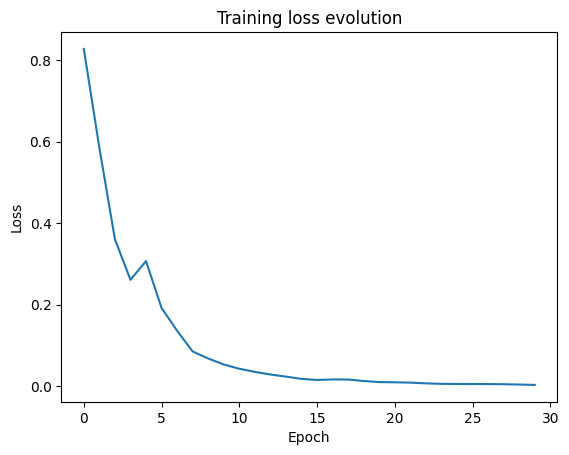

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class RNN(nn.Module):

    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()

        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        #self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden):
        #input = self.embedding(input)
        output, hidden = self.rnn(input, hidden)
        output = self.linear(output)
        return output, hidden

# Random testing
input_size = 40
hidden_size = 100
output_size = 10
n_layers = 3
batch_size = 10
X_train = torch.randn(batch_size, output_size, input_size)
y_train = torch.randn(batch_size, output_size)

# Train a model
model = RNN(input_size, hidden_size, output_size, n_layers)
hidden = torch.zeros(n_layers, batch_size, hidden_size)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()
n_epochs = 30
losses = []
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad()
    output, hidden = model(X_train, None)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot losses
plt.plot(losses)
plt.title('Training loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


